In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [92]:
train_path = "data/digit-recognizer/train.csv"
test_path = "data/digit-recognizer/test.csv"
seed = 42

In [87]:
def load_dataset(path):
    ds = pd.read_csv(path)
    y = np.array(ds.label).ravel()
    X = np.array(ds.iloc[:, 1:])
    return X, y

In [154]:
def visualize_digits(X):
    plt.figure(figsize=(12,10))
    for num in range(0, 20):
        plt.subplot(5, 4, num+1)
        data = X[num].reshape(28, 28)
        plt.imshow(data, cmap='afmhot', interpolation='None')

In [107]:
def test_model(model, X_test):
    return model.predict(X_test)

In [100]:
def get_train_test_split(X, y):
    return train_test_split(X, y, test_size=.2, random_state=seed)

In [165]:
def train_model(X_train, y_train, model_name):
    if model_name == 'decision_tree':
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
    elif model_name == 'random_forest':
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
    return model

In [175]:
def get_kaggle_test_results(model):
    test_ds = pd.read_csv("data/digit-recognizer/test.csv")
    test = np.array(test_ds)
    # Apply scaling
    test = test/255
    predictions = test_model(model, test)
    result = pd.DataFrame(data={'ImageId':np.arange(1, len(predictions)+1), 'Label':predictions}).set_index('ImageId')
    result.to_csv("data/digit-recognizer/kaggle_dt.csv")

In [157]:
# Load dataset into X, y
X, y = load_dataset(path)

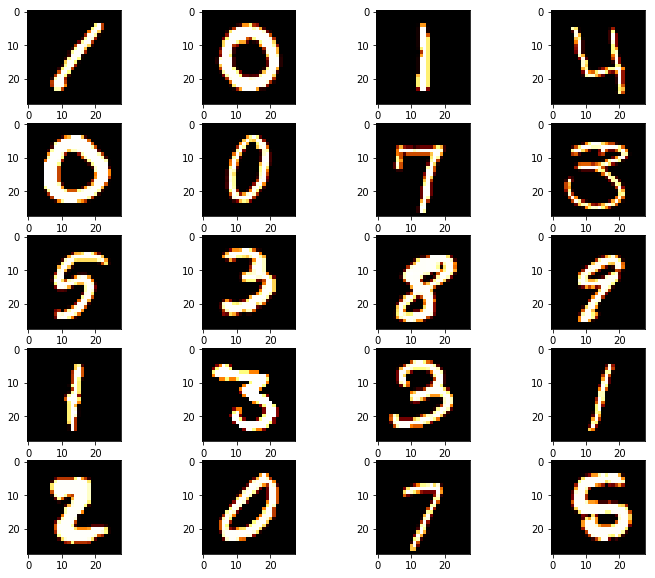

In [158]:
# Visualize data
visualize_digits(X)

In [159]:
# Split dataset
X_train, X_test, y_train, y_test = get_train_test_split(X, y)

# Simple Decision Tree classifier

In [166]:
DT = train_model(X_train, y_train, 'decision_tree')
DT_predict = test_model(DT, X_test)
accuracy_score(y_test, DT_predict)

0.8535714285714285

# Simple Random Forest classifier

In [176]:
RF = train_model(X_train, y_train, 'random_forest')
RF_predict = RF.predict(X_test)
accuracy_score(y_test, RF_predict)

/home/krazy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.940952380952381

# Neural Network with 1000 nodes and 1 hidden layers

In [178]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=0.0005, hidden_layer_sizes=(1000,), random_state=1)
NN.fit(X_train/255, y_train)

MLPClassifier(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [179]:
NN_predict = NN.predict(X_test)
accuracy_score(y_test, NN_predict)

0.4876190476190476

# CNN with Keras

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras